# Harmonic Generation in 1D

In [1]:
import os
import sys
sys.path.append('..')

In [2]:
import numpy as np
from numpy.fft import fft  # Fourier trafo
import matplotlib.pyplot as plt

import get_field_data as gfd

### Note on the Data

Two colliding 1D Gaussian waves, a probe pulse and a background pump, with
- wavelengths of $1\mu m$ and $5\mu m$,
- amplitudes of $0.1E_{cr}$ and $0.5E_{cr}$, polarized in z-direction,
- widths of $5\mu m$ and $15\mu m$.

The simulation line has a physical length of $300\mu m$ and is divided into 6000 lattice points.  
4- and 6-photon processes are simulated on top of the linear vacuum in this first scenario.

### Get the Data

In [3]:
# Data path
scratch_dir = "/project/th-scratch/a/And.Lindner/1d_hh_gen"
#scratch_dir="/home/andi/Documents/SimResults/1d_hh_gen"
# Data folder
folder = "1d_hh_gen_full"  # 4 processes

Define the parameters for passing to the `get_field_data` function.

In [4]:
# Specifications of the simulation parameters
path = os.path.join(scratch_dir, folder)
component = 2
steps = [50, 100]
n_prc = 4

In [5]:
ez = gfd.combine_steps(gfd.get_field1D, path, component, n_prc, steps=steps)

### Check it out

In [6]:
len(ez[0])

6000

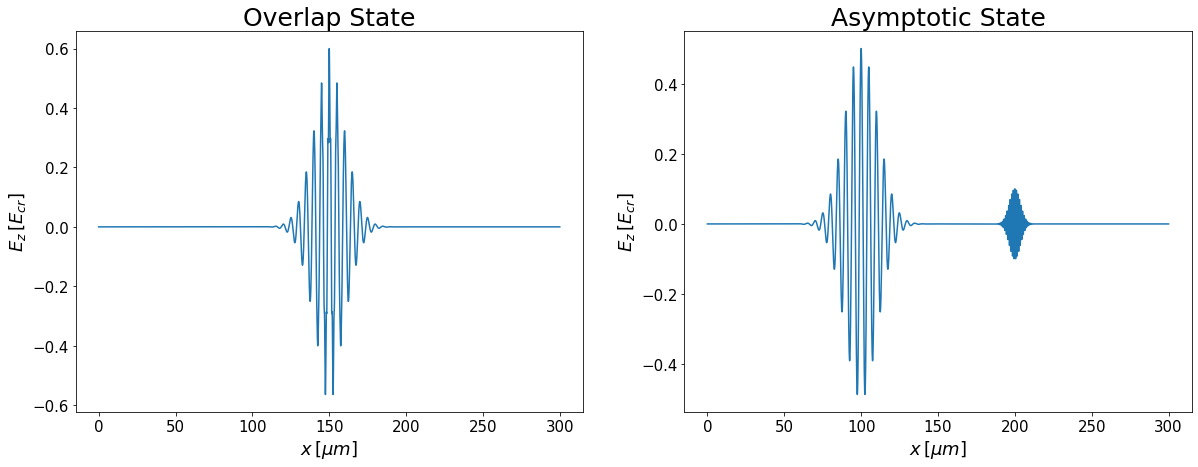

In [7]:
plt.figure(figsize=(20, 7))
for i in range(2):
    plt.subplot(1, 2, i+1)
    if(i == 0):
        plt.title("Overlap State", fontsize=25)
    if(i == 1):
        plt.title("Asymptotic State", fontsize=25)
        
    plt.plot(ez[i])
    plt.xlabel("$x \, [\mu m]$", size=18)
    plt.ylabel("$E_z \, [E_{cr}]$", size=18)
    pos_xs = np.linspace(0, 6000, 7)
    pos_labels = np.arange(0, 350, 50)
    plt.xticks(pos_xs, pos_labels, size=15)
    plt.yticks(size = 15)
    
plt.show()

# Check out the Harmonics in Frequency Space

In frequency space, after the Fourier transformation, the frequencies of the pulses are located at $\omega_p=300\mu m/1\mu m=300$ and $\omega_b=300\mu m/5\mu m=60$.

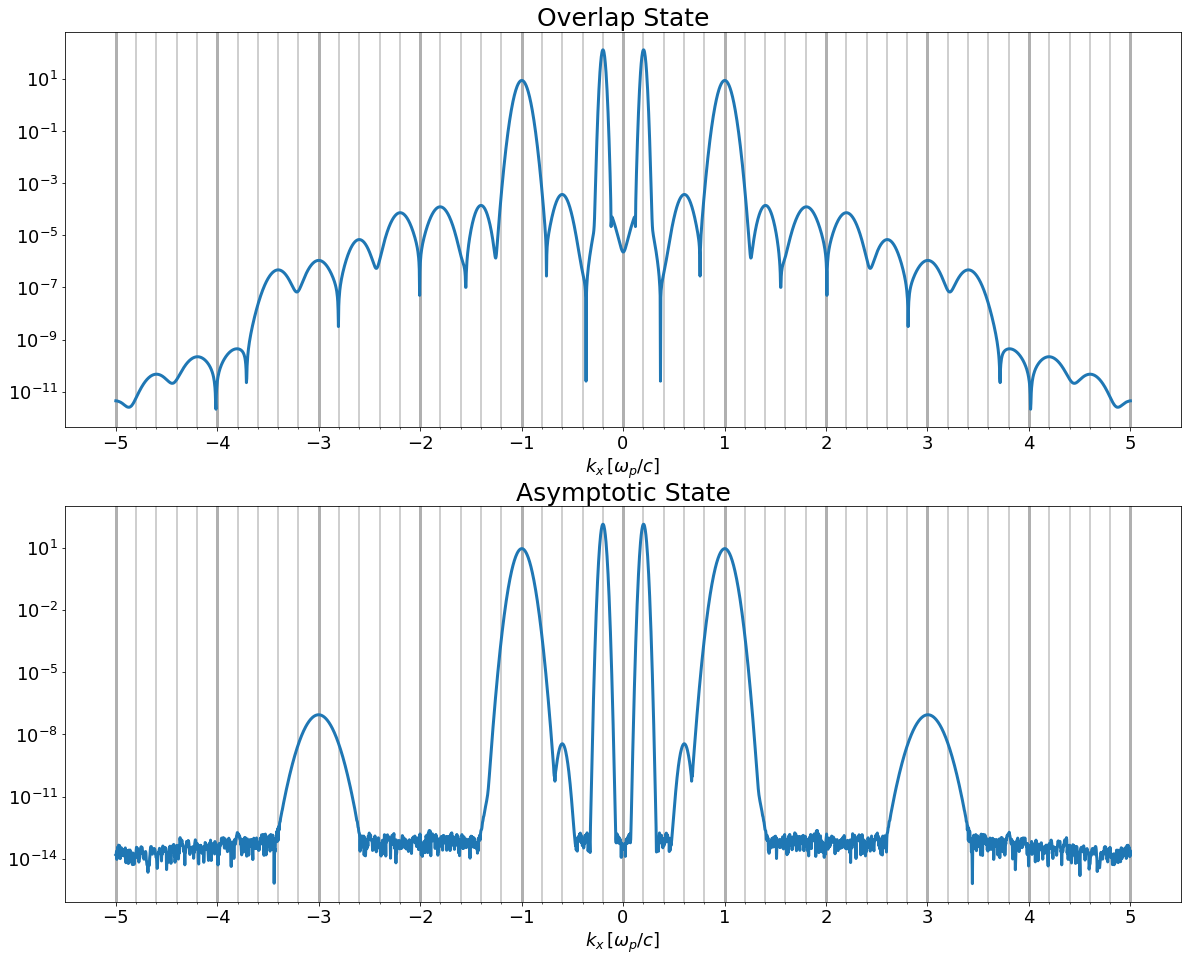

In [8]:
fft_states = []

fig = plt.figure(figsize=(20, 16))

for i in range(2):
    fft_states.append(fft(ez[i]))
    fft_states[i] = np.roll(fft_states[i], int(len(ez[i])/2))  # Center the harmonics
    fft_states[i] = np.abs(fft_states[i])
    
    ax = fig.add_subplot(2, 1, i+1)
    if(i == 0):
        ax.set_title("Overlap State", fontsize=25)
    if(i == 1):
        ax.set_title("Asymptotic State", fontsize=25)
        
    xs = np.linspace(-5, 5, 3000)  # 5*300=1500 -> up to fifth harmonic, symmetric around center
    ax.plot(xs, fft_states[i][1500:4500], lw=3)
    
    xticks = np.linspace(-5, 5, 11)
    minor_xticks = np.linspace(-5, 5, 51)

    ax.set_xticks(xticks)
    ax.set_xticks(minor_xticks, minor=True)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='x', which='minor', labelsize=12)

    ax.grid(axis="x", which='minor', linewidth = 2, alpha=0.6)
    ax.grid(axis="x", which='major', linewidth = 3)

    ax.set_yticks([])
    ax.set_yscale("log")
    
    ax.set_xlabel("$k_x \, [\omega_p/c]$", size=18)

plt.show()

Thick lines count the harmonics of the probe pulse in frequency space; thin lines, those of the pump pulse.  
Many arising harmonics can be observed.
Most of them are shortlived due to energy conservation and vanish in the asymptotic state.  
To better see the nonlinear effects and _higher_ harmonics, the linear vacuum is subtracted from the plot.

In [17]:
# Same settings but linear vacuum
folder = "1d_hh_gen_lin"
path = os.path.join(scratch_dir, folder)
ez_lin = gfd.combine_steps(gfd.get_field1D, path, component, n_prc, steps=steps)

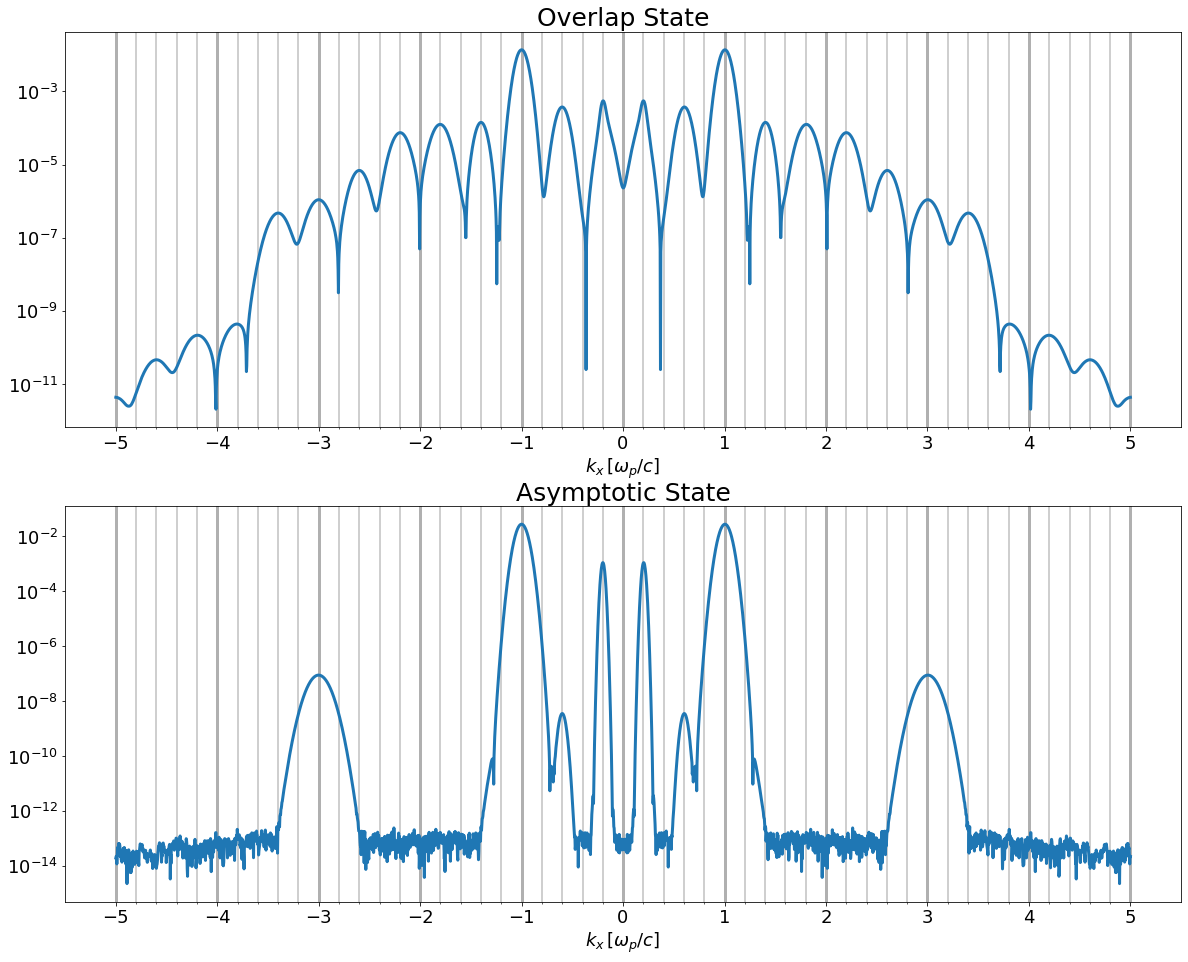

In [19]:
fft_states_nonlin = []

fig = plt.figure(figsize=(20, 16))

for i in range(2):
    fft_states_nonlin.append(fft(np.subtract(ez[i], ez_lin[i])))
    fft_states_nonlin[i] = np.roll(fft_states_nonlin[i], int(len(ez[i])/2))
    fft_states_nonlin[i] = np.abs(fft_states_nonlin[i])
    
    ax = fig.add_subplot(2, 1, i+1)
    if(i == 0):
        ax.set_title("Overlap State", fontsize=25)
    if(i == 1):
        ax.set_title("Asymptotic State", fontsize=25)
        
    xs = np.linspace(-5, 5, 3000)
    ax.plot(xs, fft_states_nonlin[i][1500:4500], lw=3)
    
    xticks = np.linspace(-5, 5, 11)
    minor_xticks = np.linspace(-5, 5, 51)

    ax.set_xticks(xticks)
    ax.set_xticks(minor_xticks, minor=True)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='x', which='minor', labelsize=12)

    ax.grid(axis="x", which='minor', linewidth = 2, alpha=0.6)
    ax.grid(axis="x", which='major', linewidth = 3)

    ax.set_yticks([])
    ax.set_yscale("log")
    ax.set_xlabel("$k_x \, [\omega_p/c]$", size=18)
    
plt.show()

Ultimately, the contributions of 4-photon and 6-photon processes to the above harmonics can be singled out by dedicated simulations.

In [11]:
# Same settings but onyl 4-photon and only 6-photon processes on top of the linear vacuum
folder4 = "1d_hh_gen_only4"
folder6 = "1d_hh_gen_only6"

path = os.path.join(scratch_dir, folder4)
ez_only4 = gfd.combine_steps(gfd.get_field1D, path, component, n_prc, steps=steps)

path = os.path.join(scratch_dir, folder6)
ez_only6 = gfd.combine_steps(gfd.get_field1D, path, component, n_prc, steps=steps)

In [12]:
len(ez_only6[0])

6000

Put them directly into the above plots.

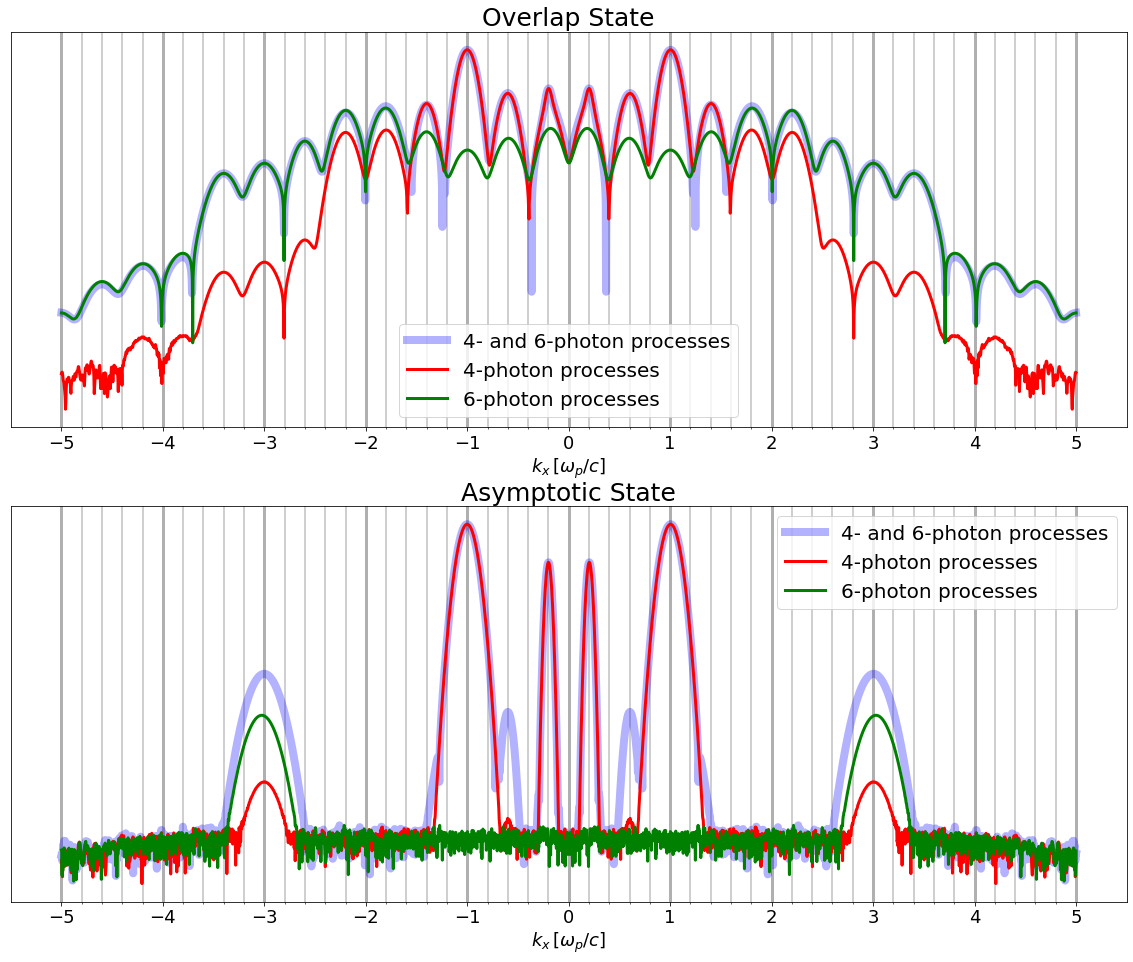

In [13]:
fft_states_nonlin = []
fft_states_only4 = []
fft_states_only6 = []

fig = plt.figure(figsize=(20, 16))

for i in range(2):
    fft_states_nonlin.append(fft(np.subtract(ez[i], ez_lin[i])))
    fft_states_nonlin[i] = np.roll(fft_states_nonlin[i], int(len(ez[i])/2))
    fft_states_nonlin[i] = np.abs(fft_states_nonlin[i])
    
    fft_states_only4.append(fft(np.subtract(ez_only4[i], ez_lin[i])))
    fft_states_only4[i] = np.roll(fft_states_only4[i], int(len(ez[i])/2))
    fft_states_only4[i] = np.abs(fft_states_only4[i])

    fft_states_only6.append(fft(np.subtract(ez_only6[i], ez_lin[i])))
    fft_states_only6[i] = np.roll(fft_states_only6[i], int(len(ez[i])/2))
    fft_states_only6[i] = np.abs(fft_states_only6[i])

    ax = fig.add_subplot(2, 1, i+1)
    if(i == 0):
        ax.set_title("Overlap State", fontsize=25)
    if(i == 1):
        ax.set_title("Asymptotic State", fontsize=25)
        
    ax.set_yscale("log")
    xs = np.linspace(-5, 5, 3000)
    ax.plot(xs, fft_states_nonlin[i][1500:4500], lw=8, c="blue", alpha=0.3, label="4- and 6-photon processes")
    ax.plot(xs, fft_states_only4[i][1500:4500], lw=3, c="red", label="4-photon processes")
    ax.plot(xs, fft_states_only6[i][1500:4500], lw=3, c="green", label="6-photon processes")
    
    xticks = np.linspace(-5, 5, 11)
    minor_xticks = np.linspace(-5, 5, 51)

    ax.set_xticks(xticks)
    ax.set_xticks(minor_xticks, minor=True)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='x', which='minor', labelsize=12)

    ax.grid(axis="x", which='minor', linewidth = 2, alpha=0.6)
    ax.grid(axis="x", which='major', linewidth = 3)

    ax.set_yticks([])
    ax.set_xlabel("$k_x \, [\omega_p/c]$", size=18)
    
    ax.legend(fontsize=20)
    
plt.show()

As can be seen in the plots above, the decomposition of _higher_ harmonics into the individual contributions from 4- and 6-photon processes fails in the asymptotic state.
In the plots above this specifically affects the third harmonic of the background pump and the third harmonic of the probe pulse.  
This is due to dispersion effefcts that affect higher frequencies more.
The code itself does nothing else than to add the indiviual contributions in the weak-field expansion, yet these higher harmonics suffer from the discretization on the grid.
Finer grids remedy this effect.  
The overlap position is accurate as the higher harmonics are generated there.
The later the "asympotitic" state is evaluated, the more the amplitudes of the higher harmonics might shrink.